In [6]:
# Monter Google Drive pour acceder au dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Installer la bibliothèque Ultralytics qui contient YOLOv5 pour la détection d'objets
!pip install ultralytics

# Importer les bibliothèques nécessaires
import os                # Module pour interagir avec le système d'exploitation
import shutil            # Module pour effectuer des opérations de haut niveau sur les fichiers et répertoires
import glob              # Module pour trouver tous les chemins correspondants à un motif spécifié
from sklearn.model_selection import train_test_split  # Fonction pour diviser les données en ensembles d'entraînement et de test
from ultralytics import YOLO  # Importer la classe YOLO du package Ultralytics pour la détection d'objets
import random            # Module pour générer des nombres pseudo-aléatoires (pour choisir une image aléatoire dans le test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 17.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
# Naviguer vers le dossier contenant les données
os.chdir('/content/drive/My Drive/YOLOV8/brain_tumor_dataset')

# Créer des répertoires pour les données divisées en ensembles d'entraînement et de test
os.makedirs('yolov8_data/images/train', exist_ok=True)  # Créer le répertoire pour les images d'entraînement
os.makedirs('yolov8_data/images/test', exist_ok=True)   # Créer le répertoire pour les images de test
os.makedirs('yolov8_data/labels/train', exist_ok=True)  # Créer le répertoire pour les annotations d'entraînement
os.makedirs('yolov8_data/labels/test', exist_ok=True)   # Créer le répertoire pour les annotations de test

# Diviser les données en ensembles d'entraînement et de test, puis copier les images et créer les annotations correspondantes
def split_and_copy_images(category):
    # Obtenir les chemins des images dans la catégorie spécifiée
    image_paths = glob.glob(f'{category}/*')
    # Diviser les chemins des images en ensembles d'entraînement et de test
    train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

    # Copier les images et créer les annotations pour l'ensemble d'entraînement
    for img_path in train_paths:
        img_name = os.path.basename(img_path)  # Extraire le nom du fichier image
        # Copier l'image dans le répertoire d'entraînement des images
        shutil.copy(img_path, f'yolov8_data/images/train/{img_name}')
        # Créer le fichier d'annotation correspondant
        label_file = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
        with open(f'yolov8_data/labels/train/{label_file}', 'w') as f:
            # Définir l'étiquette en fonction de la catégorie ('yes' ou 'no')
            label = 0 if category == 'yes' else 1
            # Écrire l'annotation dans le fichier au format YOLO (classe x_centre y_centre largeur hauteur)
            f.write(f'{label} 0.5 0.5 1.0 1.0\n')

    # Copier les images et créer les annotations pour l'ensemble de test
    for img_path in test_paths:
        img_name = os.path.basename(img_path)  # Extraire le nom du fichier image
        # Copier l'image dans le répertoire de test des images
        shutil.copy(img_path, f'yolov8_data/images/test/{img_name}')
        # Créer le fichier d'annotation correspondant
        label_file = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
        with open(f'yolov8_data/labels/test/{label_file}', 'w') as f:
            # Définir l'étiquette en fonction de la catégorie ('yes' ou 'no')
            label = 0 if category == 'yes' else 1
            # Écrire l'annotation dans le fichier au format YOLO (classe x_centre y_centre largeur hauteur)
            f.write(f'{label} 0.5 0.5 1.0 1.0\n')

# Appliquer la fonction de division aux catégories 'yes' et 'no'
split_and_copy_images('yes')  # Diviser et copier les images de la catégorie 'yes'
split_and_copy_images('no')   # Diviser et copier les images de la catégorie 'no'

In [9]:
# Définir le contenu du fichier de configuration YAML pour le modèle YOLOv8
yaml_content = """
train: /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/images/train  # Chemin vers le répertoire d'entraînement des images
val: /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/images/test   # Chemin vers le répertoire de test des images
batch: 8             # Taille du lot (batch size) utilisée pendant l'entraînement
dropout: 0.1         # Taux de dropout utilisé dans le modèle
nc: 2                # Nombre de classes dans le jeu de données (tumeur et non tumeur)
names: ['tumor', 'no_tumor']  # Noms des classes dans l'ordre correspondant à leur index de classe
"""

# Créer le fichier de configuration YAML pour le modèle YOLOv8
with open('/content/drive/My Drive/YOLOV8/brain_tumor_dataset/brain_tumor.yaml', 'w') as yaml_file:
    yaml_file.write(yaml_content)  # Écrire le contenu YAML dans le fichier

In [10]:
# Charger le modèle YOLOv8 à partir du fichier de poids spécifié (yolov8n.pt)
model = YOLO('yolov8n.pt')

# Entraîner le modèle en utilisant les données spécifiées dans le fichier de configuration YAML et pour le nombre d'époques spécifié
model.train(data='/content/drive/My Drive/YOLOV8/brain_tumor_dataset/brain_tumor.yaml', epochs=10)

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.6MB/s]


Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/YOLOV8/brain_tumor_dataset/brain_tumor.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/labels/train... 138 images, 64 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:02<00:00, 71.36it/s]


train: New cache created: /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/labels/test... 35 images, 16 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 88.95it/s]

val: New cache created: /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/labels/test.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.153      4.644      1.885          8        640: 100%|██████████| 13/13 [03:05<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.40s/it]

                   all         51         35    0.00234          1      0.477      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.2465      2.947       1.06          7        640: 100%|██████████| 13/13 [02:56<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.04s/it]

                   all         51         35    0.00228          1      0.469      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.1842      2.762      0.999          8        640: 100%|██████████| 13/13 [02:55<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.98s/it]

                   all         51         35      0.391      0.974       0.63      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.1864      2.304     0.9794          7        640: 100%|██████████| 13/13 [02:56<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.75s/it]

                   all         51         35      0.518      0.425       0.63      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.1936      2.145      1.021          9        640: 100%|██████████| 13/13 [02:58<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.51s/it]

                   all         51         35      0.609      0.645      0.712      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.1598      1.962     0.9693          6        640: 100%|██████████| 13/13 [02:53<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.96s/it]

                   all         51         35      0.587      0.811      0.743      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.1465      1.971      0.984          7        640: 100%|██████████| 13/13 [02:54<00:00, 13.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.98s/it]

                   all         51         35      0.576      0.827      0.632      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.1345      1.791     0.9445          6        640: 100%|██████████| 13/13 [02:55<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.45s/it]

                   all         51         35      0.716      0.791      0.735      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.1488      1.641      0.937          8        640: 100%|██████████| 13/13 [02:58<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.62s/it]

                   all         51         35      0.583      0.854      0.731      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.1396      1.689     0.9495          6        640: 100%|██████████| 13/13 [02:54<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.01s/it]

                   all         51         35      0.622      0.791      0.764      0.747



10 epochs completed in 0.540 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]


                   all         51         35      0.623      0.791      0.764      0.747
                 tumor         16         16      0.506      0.688      0.652       0.65
              no_tumor         19         19      0.739      0.895      0.877      0.845
Speed: 3.3ms preprocess, 262.8ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5f41345690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/images/test/Y86.JPG: 640x512 1 tumor, 186.4ms
Speed: 3.0ms preprocess, 186.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


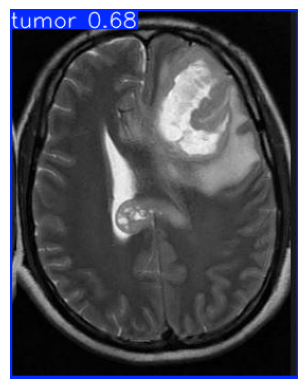

Tested image: /content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/images/test/Y86.JPG


In [22]:
import cv2
import matplotlib.pyplot as plt

# Charger le modèle entraîné à partir du fichier de poids spécifié
model = YOLO('/content/drive/My Drive/YOLOV8/brain_tumor_dataset/runs/detect/train/weights/best.pt')

# Lister toutes les images du dossier de test
test_images_path = '/content/drive/My Drive/YOLOV8/brain_tumor_dataset/yolov8_data/images/test'
test_images = glob.glob(test_images_path + '/*')

# Choisir une image aléatoirement parmi les images de test
random_image_path = random.choice(test_images)

# Classification, Segmentation et Détection d'objets sur l'image choisie
results = model(random_image_path)

# Afficher les résultats pour chaque image dans les résultats
for result in results:
    # Obtenir l'image avec les annotations
    annotated_frame = result.plot(show=False)

    # Convertir l'image de BGR à RGB
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Afficher l'image annotée
    plt.imshow(annotated_frame_rgb)
    plt.axis('off')
    plt.show()

# Afficher le chemin de l'image testée
print("Tested image:", random_image_path)